In [27]:
from extra_data import open_run
import scorpy

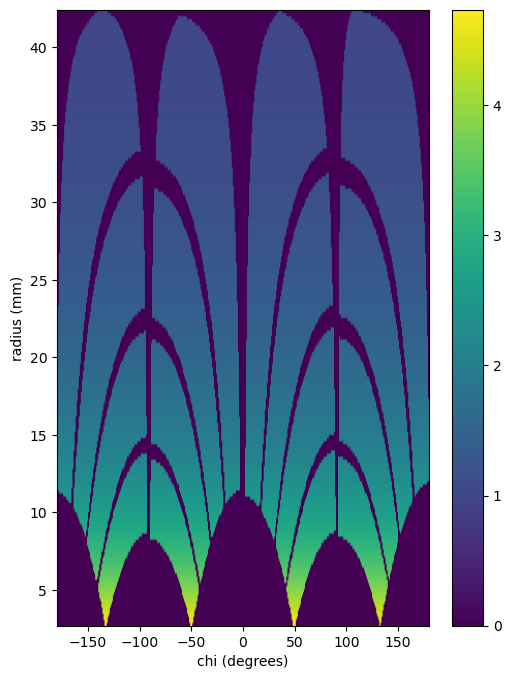

In [20]:
# Load geometry from CrystFEL format file
from extra_geom import AGIPD_1MGeometry
from pyFAI.integrator.azimuthal import AzimuthalIntegrator
import numpy as np

geom = AGIPD_1MGeometry.from_crystfel_geom("/gpfs/exfel/exp/SPB/202304/p003378/scratch/geometry/2023_04_05-p3378_final.geom")
import matplotlib.pyplot as plt


# Generate a simple pattern with a sharper ring and a broader one
px, py, pz = np.moveaxis(geom.get_pixel_positions(), -1, 0)

r = np.sqrt((px ** 2) + (py ** 2))

a1, b1, c1 = 1, 0.15, 0.08
a2, b2, c2 = 1, 0.06, 0.002
frame = (
    a1 * np.exp(- ((r-b1) ** 2) / (2 * c1 ** 2)) +
    a2 * np.exp(- ((r-b2) ** 2) / (2 * c2 ** 2))
)

ai = AzimuthalIntegrator(
    detector=geom.to_pyfai_detector(),
    dist=0.122,  # sample-detector distance (m)
    wavelength=(12.3984 / 9.3) * 1e-10  # wavelength (m)
)

I, rint2d, chi = ai.integrate2d(
    #frame.reshape(16*512, 128),
    np.ones( (16*512, 128)),
    200,
    360,
)

#I[55:65, 65:75] = 6 
#I[115:125, 65:75] = 6 

plt.figure(figsize=(6, 8))
plt.imshow(I.T[::], aspect='auto',
          extent=(-180, 180, rint2d[0], rint2d[-1]))
plt.ylabel('radius (mm)')
plt.xlabel('chi (degrees)')
plt.colorbar()

In [11]:
import scorpy
c = scorpy.CorrelationVol(nq=200, npsi=360, qmin=rint2d[0], qmax=rint2d[-1], cos_sample=False)
c.correlate_convolve(I.T)

xx


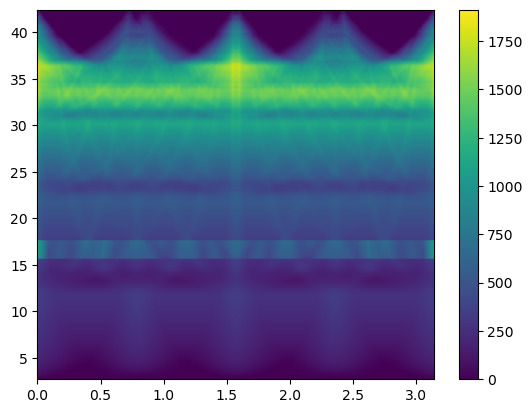

In [18]:
c.plot_q1q2()

In [14]:
print(type(I))

<class 'numpy.ndarray'>


In [15]:
from extra_data import RunDirectory


run_red = RunDirectory("/gpfs/exfel/exp/SPB/202304/p003378/red/r0510")
run_raw = RunDirectory("/gpfs/exfel/exp/SPB/202304/p003378/raw/r0510")